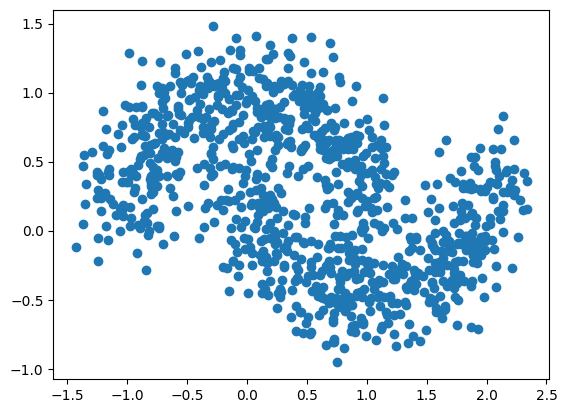

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

data, labels = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=None)
plt.scatter(data.T[0],data.T[1])

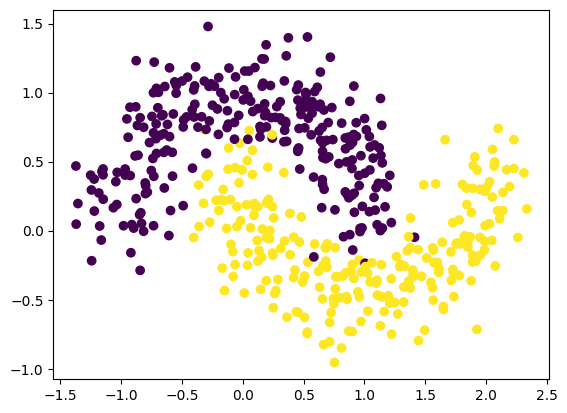

In [2]:
# Divide training test
from sklearn import model_selection
data_train, data_test, labels_train, labels_test =  model_selection.train_test_split(data, labels, test_size=.5, train_size=.5, random_state=None, shuffle=True, stratify=None)
plt.scatter(data_train.T[0], data_train.T[1], c = labels_train)

In [4]:
# Growing Spheres:
from scipy.special import gammainc
from matplotlib import pyplot as plt


def GrowingSpheres(clf, observation, m, n):
    stop = False
    x_pred = clf.predict([observation]) # in {-1, 1}
    while not stop:
        z = GenerateOnSL(observation, 0, m, n, 2)
        z_pred = clf.predict(z)
        stop = all(x_pred == z_unit for z_unit in z_pred)
        m = m/2
    a_0 = m
    a_1 = 2*m
    stop = False
    while all(z_unit == x_pred for z_unit in z_pred):
        z = GenerateOnSL(observation, a_0, a_1, n, 2)
        z_pred = clf.predict(z)
        a_0 = a_1
        a_1 = a_1 + m
    norm_distances = [np.linalg.norm(observation -z[i]) if z_pred[i] != x_pred else 0 for i in range(len(z_pred))]
    return z[np.argmax(norm_distances)]
    
def GenerateOnSL(center, minR, maxR, nbSamples, dimensions):
    # we obtain r varying between minR and maxR
    R = np.random.uniform(minR, maxR, size = nbSamples)
    points = []
    x = np.random.normal(scale=1,size=(nbSamples, dimensions))
    x_norm = [x[i]/ np.linalg.norm(x, axis = 1)[i] for i in range(x.shape[0])]
    for i, x_point in enumerate(x_norm):
        r = np.random.uniform(minR,maxR)
        points.append(x_point * R[i] + center )
    return np.array(points)

In [14]:
from mlxtend.plotting import plot_decision_regions

def plotEverything(X,Y,classifier,title, obs, enemies, labels):

    plot_decision_regions(X, Y, clf=classifier, legend=2)
    
    plt.scatter(obs[0], obs[1], c = 'lime',marker= 'x')
    for i, enemy in enumerate(enemies): 
        plt.scatter(enemy.T[0], enemy.T[1], marker = '*')
        plt.annotate(labels[i], (enemy.T[0], enemy.T[1]))
    # Adding axes annotations
    plt.title(title)
    plt.show()

In [15]:
seed = 123456

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


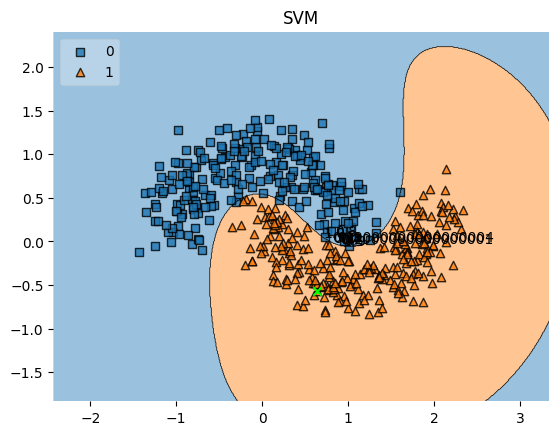

In [16]:

# SVM
choice = np.random.choice(len(data_test))
obs = data_test[choice]
from sklearn import svm

svmClassifier = svm.SVC()
svmClassifier.fit(data_train, labels_train)
prediction = svmClassifier.predict(data_test)
enemies = []
labels = []
for i in np.arange(0.1,1.1, 0.1):
    print(i)
    enemy = GrowingSpheres(svmClassifier, obs, i/10, 20)
    enemies.append(enemy)
    labels.append(str(i))
plotEverything(data_test,prediction,svmClassifier,'SVM', obs, enemies, labels)

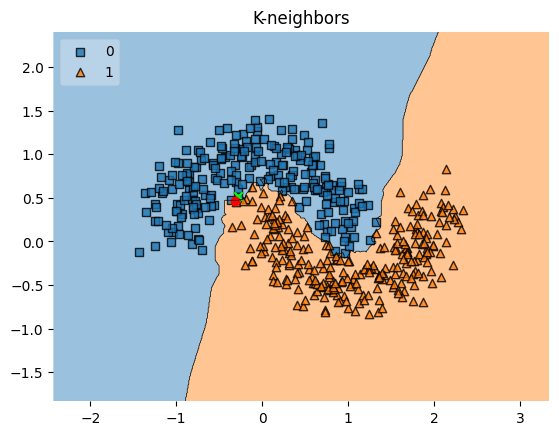

In [8]:
# KNNN
from sklearn import neighbors
choice = np.random.choice(len(data_test))
obs = data_test[choice]

knnClassifier = neighbors.KNeighborsClassifier(n_neighbors=3)
knnClassifier.fit(data_train, labels_train)
prediction = knnClassifier.predict(data_test)
enemy = GrowingSpheres(knnClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,knnClassifier,'K-neighbors', obs, enemy)


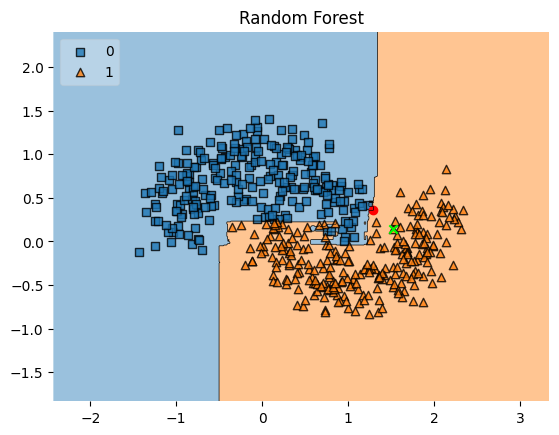

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

choice = np.random.choice(len(data_test))
obs = data_test[choice]

rfClassifier = RandomForestClassifier(max_depth=4, random_state=0)
rfClassifier.fit(data_train, labels_train)
prediction = rfClassifier.predict(data_test)
enemy = GrowingSpheres(rfClassifier, obs, 0.1, 20)
plotEverything(data_test,prediction,rfClassifier,'Random Forest', obs, enemy)